<img src="https://www.rp.edu.sg/images/default-source/default-album/rp-logo.png" width="200" alt="Republic Polytechnic"/>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ipomoeabatatas/ubts_day_01/blob/main/CrewAI/Activity_02_Answer.ipynb)

## Build Agents with access to Email system using Langchain Tools


In this lesson, you'll deepen your understanding of tool use in multi-agent systems, focusing on tools provided by the Langchain
framework.

Building on previous concepts, you’ll learn how to equip agents and task with access to your Gmail system to perform operations such as authentication, search, draft and sending emails.


finally, we'll also explore how this integrates with the CrewAI framework.

## Getting Started.

This notebook is designed to work in Google Colab.
For secret and keys, it has to be stored and accessed via the Secrets feature.

**Create** a secret key OPENAI_API_KEY using the SECRET Features.

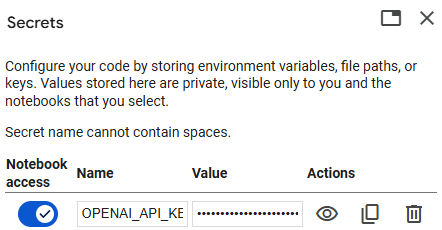

## Install the required projects


In [ ]:
!pip install --quiet crewai==0.108.0
!pip install --quiet crewai-tools==0.40.0
!pip install --quiet boto3  # workaround for incomplete crewai-tools dependency

#needed for gmail
!pip install --quiet google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client



In [ ]:
! pip freeze | grep crewai

Expected results:  
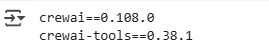

In [ ]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

import os
from datetime import datetime


# Set variables for control
__TODO__ = None
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')  # e.g., 20250408_153012


In [9]:
#from google.colab import userdata
from crewai import Agent, Task, Crew, LLM
from crewai.tools import tool

## Langchain Gmail Toolkit Setup


The Gmail toolkit interacts with the GMail API to read messages, draft and send messages. To use this toolkit, you will need to set up your credentials as explained in the Gmail API docs (https://developers.google.com/gmail/api/quickstart/python#authorize_credentials_for_a_desktop_application).

https://vijaykumarkartha.medium.com/create-your-personal-gmail-ai-agent-using-langchain-da95d1a9171a


Once you've downloaded the credentials.json file, you should upload the credential file to the working folder(i.e. the same directory as this notebook).


In [2]:
### **Please complete the above step before proceeding.**
## Import relevant package

from langchain_community.agent_toolkits.gmail.toolkit import GmailToolkit
from langchain_community.tools.gmail.search import GmailSearch
from langchain_community.tools.gmail.get_message import GmailGetMessage
from langchain_community.tools.gmail.create_draft import GmailCreateDraft
from langchain_community.tools.gmail.send_message import GmailSendMessage

## Instantiation

By default the toolkit reads the local credentials.
json file for authentication.

Click the link to sign on to Gmail.

If the authenication is successful, you will see a
token created saved in the project folder.


** Issue **
This cell does not work from Notebook environment.

Do the following before you run the
Please open a terminal, and enter a Python environment.
Copy out the link and continue with the authentication
Python 3.10.0 (default, Mar  3 2022, 09:58:08) [GCC 7.5.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> from langchain_community.agent_toolkits.gmail.toolkit import GmailToolkit
>>> toolkit = GmailToolkit()

In [3]:
gmail_tool = GmailToolkit()

## Tools Availability
- GmailCreateDraft - Tool that creates a draft email for Gmail
- GmailSendMessage - Tool that sends a message to Gmail.
- GmailSearch - Tool that searches for messages or threads in Gmail
- GmailGetMessage - Tool that gets a message by ID from Gmail.
- GmailGetThread - Tool that gets a thread by ID from Gmail.

In [4]:
tools = gmail_tool.get_tools()
tools

[GmailCreateDraft(api_resource=<googleapiclient.discovery.Resource object at 0x7f54d2ffca00>),
 GmailSendMessage(api_resource=<googleapiclient.discovery.Resource object at 0x7f54d2ffca00>),
 GmailSearch(api_resource=<googleapiclient.discovery.Resource object at 0x7f54d2ffca00>),
 GmailGetMessage(api_resource=<googleapiclient.discovery.Resource object at 0x7f54d2ffca00>),
 GmailGetThread(api_resource=<googleapiclient.discovery.Resource object at 0x7f54d2ffca00>)]

## Searching for a Email
To search for mails, you need to instantiate a GmailSearch object and pass in the API resources that
was returned from the authentication proess.

In Gmail, search operations (also called search operators or search strings) are powerful tools that help you find specific emails quickly by applying filters based on criteria like sender, subject, labels, attachments, date, and more.
also known as https://kinsta.com/blog/gmail-search-operators/



In [24]:
# Search for emails in the inbox and is unread
search = GmailSearch(api_resource=gmail_tool.api_resource)
emails = search.invoke('is:unread in:inbox "FYA" ' )
print (emails)

[{'id': '19622c43cfa11c99', 'threadId': '19622c43cfa11c99', 'snippet': 'Official (Closed) \\ Sensitive Normal FYA Please update on the project. Also, tell me a Apple joke. Best Regards Tan Poh Keam Senior Lecturer School of Infocomm Republic Polytechnic 9 Woodlands Ave 9,', 'body': 'Official (Closed) \\ Sensitive Normal\r\n\r\nFYA\r\n\r\nPlease update on the project.\r\nAlso, tell me a Apple joke.\r\n\r\n\r\nBest Regards\r\n\r\nTan Poh Keam\r\nSenior Lecturer\r\nSchool of Infocomm\r\n\r\n[cid:image001.jpg@01DBAACC.D7534310]\r\n\r\nRepublic Polytechnic\r\n9 Woodlands Ave 9, Singapore 738964\r\nDID: 6697-1277 | General Enquiries: 6510-3000\r\n\r\nwww.rp.edu.sg |  [cid:image002.png@01DBAACC.D7534310]     [cid:image003.png@01DBAACC.D7534310]    [cid:image004.png@01DBAACC.D7534310]     [cid:image005.png@01DBAACC.D7534310]     [cid:image006.png@01DBAACC.D7534310]     [cid:image007.png@01DBAACC.D7534310] \r\n\r\nCONFIDENTIALITY CAUTION: This message is intended only for the use of the individ

##  Read a Message
To search for mails, you need to instantiate a GmailGetMessage object and pass in the API resources that was returned from the authentication process.

You need to pass in a message ID.
From the previous step, update the cell below with a valid message_id

In [6]:
message_id = None  # to replace
message_id = "1961f709776738a2"
get_msg = GmailGetMessage(api_resource=gmail_tool.api_resource)
message = get_msg.run(message_id)  # if it doesn't work, try invoke method
print (message)


{'id': '1961f709776738a2', 'threadId': '1961f6c4b2022834', 'snippet': 'A new sign-in on Windows msgubts@gmail.com We noticed a new sign-in to your Google Account on a Windows device. If this was you, you don&#39;t need to do anything. If not, we&#39;ll help you secure', 'body': '[image: Google]\r\nA new sign-in on Windows\r\n\r\n\r\nmsgubts@gmail.com\r\nWe noticed a new sign-in to your Google Account on a Windows device. If\r\nthis was you, you don’t need to do anything. If not, we’ll help you secure\r\nyour account.\r\nCheck activity\r\n\r\nYou can also see security activity at\r\nhttps://myaccount.google.com/notifications\r\nYou received this email to let you know about important changes to your\r\nGoogle Account and services.\r\n© 2025 Google LLC, 1600 Amphitheatre Parkway, Mountain View, CA 94043, USA\r\n', 'subject': 'Security alert', 'sender': 'Google <no-reply@accounts.google.com>'}


## Create a Draft Email

To create a draft mail, you need to instantiate a GmailCreateDraft object and pass in the API resources that was returned from the authentication process.

To create a draft email, you need to pass in a payload indicating who it need to be sent to, the subject, and message.

The email will be saved in the Draft folder of the email account.

In [10]:
draft_payload = {
            "to": ['someone@email.com'],
            "subject": "hello",
            "message": "Let's go a walk"
        }

draft = GmailCreateDraft(api_resource=gmail_tool.api_resource)
result = draft.run(draft_payload)
print (result)

Draft created. Draft Id: r6514666115645951756


## Langchain Tool in CrewAI

At the point of writing, for a CrewAI Agent to use the langchain tool, you need to create a personalized tool, inherit from BaseTool, or use the @tool declaration and define the necessary attributes, including the args_schema for input validation, and the _run method to run / invoke the gmail toolkit.

Ref to https://docs.crewai.com/how-to/create-custom-tools#subclassing-basetool and https://docs.crewai.com/how-to/create-custom-tools#using-the-tool-decorator for further documents.



## Let's define the authentication tool.

In [ ]:
## We can skip this as the authentication is build into
## the subsequent tools

## Let's define the search tool.

In [ ]:
@tool("search_gmail")
def search_gmail(query: str):
      """
      Useful for searching for gmails based on a search string
      The input should be a valid Gmail search string
      Use the default 'is:unread in:inbox "FYA"  '.
      """
      try:
            gmail = GmailToolkit()  # custom GmailToolkit
      except Exception as e:
            return f"Failed to authenticate Gmail: {e}"

      search_tool = GmailSearch(api_resource=gmail.api_resource)
      result = search_tool.invoke(query)

      return f"\nSearch details: {result}\n"



## Let's define the get message tool.

In [31]:
@tool("get_message")
def get_message(message_id: str):
      """
      Useful for retrieving an full meesage  from Gmail.
      The input should be a valid Gmail message id.
      For example, `18923fda12e3a4b1`.
      """
      try:
            gmail = GmailToolkit()  # custom GmailToolkit
      except Exception as e:
            return f"Failed to authenticate Gmail: {e}"

      thread_tool = GmailGetMessage(api_resource=gmail.api_resource)
      result = thread_tool.run(message_id)

      return f"\nMessage details: {result}\n"

## Let's define the create draft tool

We will use the XX method as we need to be be strictly in the parameters in order for the
tool to work properly

In [13]:
from pydantic import BaseModel, Field
from crewai.tools import BaseTool

class CreateDraftInput(BaseModel):
    email: str = Field(..., description="Recipient's email address")
    subject: str = Field(..., description="subject description")
    body: str = Field(..., description="draf email body content")

class CreateDraftTool(BaseTool):
    name: str = "create_draft"
    description: str = "Useful to create an email draft."
    args_schema: type[BaseModel] = CreateDraftInput

    def _run(self, email: str, subject: str, body: str) -> str :
        try:
          gmail = GmailToolkit()
        except Exception as e:
          return f"Failed to authenticate Gmail: {e}"
        # Create draft payload
        draft_payload = {
            "to": [email],
            "subject": subject,
            "message": body
        }
        # Attempt to create the draft
        try:
            draft = GmailCreateDraft(api_resource=gmail.api_resource)
            result = draft.run(draft_payload)
            return f"Draft created successfully: {result}"
        except Exception as e:
            return f"Error creating draft: {str(e)}"


## Finally, let's instantiate the tools


In [52]:
mail_search_tool = search_gmail
mail_get_msg_tool = get_message
mail_draft_tool = CreateDraftTool()

## Define the LLM For The Agent
In the example below, OpenAI is used. We can either
set the connection information through the environment variables,
or directly input as a parameter in the LLM class.

In [ ]:
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
#os.environ["OPENAI_MODEL_NAME"] = 'gpt-3.5-turbo'

llm = LLM(model="openai/gpt-4o",  # try replace with gpt-4o-mini
          api_key=userdata.get('OPENAI_API_KEY')
)


In [14]:
llm = LLM(model="openai/gpt-4o")  # try replace with gpt-4o-mini


## Creating Agents

- Define your Agents, and provide them a `role`, `goal` and `backstory`.
- It has been seen that LLMs perform better when they are role playing.

This crew will have 1 agent, performing 3 tasks.
* search_agent:
* read_msg_agent:
* draft_reply_agent:


## Define the agent


In [53]:
gmail_agent = Agent(
    role="Gmail Assistant",
    goal="Search Gmail, read a thread, and draft a reply email automatically",
    backstory="You're a Gmail productivity bot that helps users manage emails end-to-end.",
    tools= [mail_search_tool, mail_get_msg_tool, mail_draft_tool],
    verbose=True,
    llm=llm,
)


LLM value is already an LLM object


## Creating Tasks

- Define your Tasks, and provide them a `description`, `expected_output` and `agent`.

In [63]:

# --------------------------
# Define Tasks
# --------------------------
search_task = Task(
    description="Search Gmail for unread email in the inbox."
                "Narroww the search for key word or phrase such as FYA or 'For Your Action'."
                "Use the search string 'is:unread in:inbox FYA 'For Your Action.",
    expected_output="A list of Gmail message id.",
    verbose=True,
    agent=gmail_agent
)

read_task = Task(
    description="Read a mail based on the email returned from prior task."
                 "Summarize it.",
    expected_output="A 3-sentence summary of the email.",
    verbose=True,
    agent=gmail_agent
)

draft_task = Task(
    description="Draft a reply email ."
                "The reply should include a summary of the request"
                "and a confirmation that the request has been received."
                "The reply should be polite and professional, and concise."
                "The reply should be signed with your name ALI SHAN."
                "Send the draft to originating email address with subject about your request'.",
    expected_output="A draft email created via Gmail Toolkit.",
    verbose=True,
    agent=gmail_agent
)



## Creating the Crew

- Create your crew of Agents
- Pass the tasks to be performed by those agents.
    - **Note**: *For this simple example*, the tasks will be performed sequentially (i.e they are dependent on each other), so the _order_ of the task in the list _matters_.
- `verbose=True` allows you to see all the logs of the execution. Default is false

In [64]:
# --------------------------
# Crew Setup
# --------------------------
crew = Crew(
    agents=[gmail_agent],
    tasks=[search_task, read_task, draft_task],
    verbose=True
)

## Running the Crew

**Note**: LLMs can provide different outputs for they same input, so what you get might be different than what you see in the video.

The reply will be saved to a file, as defined within the task.

In [65]:
result = crew.kickoff(inputs=None)

# Agent: Gmail Assistant
## Task: Search Gmail for unread email in the inbox.Narroww the search for key word or phrase such as FYA or 'For Your Action'.Use the search string 'is:unread in:inbox FYA 'For Your Action.


# Agent: Gmail Assistant
## Thought: Thought: I will begin by searching Gmail using the provided search string "is:unread in:inbox FYA" to locate relevant unread emails that need action.
## Using tool: search_gmail
## Tool Input: 
"{\"query\": \"is:unread in:inbox FYA\"}"
## Tool Output: 

Search details: [{'id': '19622c43cfa11c99', 'threadId': '19622c43cfa11c99', 'snippet': 'Official (Closed) \\ Sensitive Normal FYA Please update on the project. Also, tell me a Apple joke. Best Regards Tan Poh Keam Senior Lecturer School of Infocomm Republic Polytechnic 9 Woodlands Ave 9,', 'body': 'Official (Closed) \\ Sensitive Normal\r\n\r\nFYA\r\n\r\nPlease update on the project.\r\nAlso, tell me a Apple joke.\r\n\r\n\r\nBest Regards\r\n\r\nTan Poh Keam\r\nSenior Lecturer\r\nSchool o

- Display the results of your execution as markdown in the notebook.
- You may notice that the Agent have successful make queries against the private data source. However, it may have also tapped on its own knowledge.
As a challenge, iterate on the task and agent instructions.

In [ ]:
from IPython.display import Markdown
Markdown(result.raw)

## Additional Activities

1. Find additional documents
2. Copy into the private_data folder
3. Update the Simple Directory to accept the new file types
4. Modify question set.